# Part 1: Data Exploration and Preprocessing

In this notebook, you will implement functions to load, preprocess, and visualize physiological data from the Wearable Exam Stress Dataset.

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import os

# Set style for plots
sns.set_theme()
%matplotlib inline

## 1. Data Loading

Implement the `load_data` function to read and organize the physiological data from the dataset.

In [3]:
def load_data(data_dir = '/workspaces/4-it-s-about-time-rishim3000/data/a-wearable-exam-stress-dataset-for-predicting-cognitive-performance-in-real-world-settings-1.0.0/Data'):
    """Load and organize the physiological data from the dataset.
    
    Parameters
    ----------
    data_dir : str
        Path to the directory containing the dataset files
        
    Returns
    -------
    pd.DataFrame
        DataFrame containing the organized physiological data with columns:
        ['timestamp', 'heart_rate', 'eda', 'temperature', 'subject_id', 'session']
    """

    all_data = []

    #isolating each student's folder
    for subject_id in os.listdir(data_dir):
        subject_path = os.path.join(data_dir, subject_id)

        #isolating each session folder
        for session_name in os.listdir(subject_path):
            session_path = os.path.join(subject_path, session_name)
            
            session_data = {} #empty dict to store values of each biomarker

            #focusing on important files only: HR, EDA, and TEMP
            for signal_file in ['HR.csv', 'EDA.csv', 'TEMP.csv']:
                file_path = os.path.join(session_path, signal_file)
                
                #read files into session_data dictionary (key = signal)
                if os.path.exists(file_path):
                    signal_name = signal_file.split('.')[0]
                    df = pd.read_csv(file_path, header=None)
                    session_data[signal_name] = df
        
            if len(session_data) == 3:

                combined_data = pd.DataFrame()

                combined_data['timestamp'] = range(len(session_data['HR']))

                combined_data['heart_rate'] = session_data['HR'][0]
                combined_data['eda'] = session_data['EDA'][0]
                combined_data['temperature'] = session_data['TEMP'][0]

                combined_data['subject_id'] = subject_id
                combined_data['session'] = session_name
                
                all_data.append(combined_data)
            
    
    full_data = pd.concat(all_data, ignore_index=True)
    full_data = full_data.reset_index(drop=True)
    return full_data


load_data()
                        

,timestamp,heart_rate,eda,temperature,subject_id,session
0,0,1.539435e+09,1.539435e+09,1.539435e+09,S5,Midterm 1
1,1,1.000000e+00,4.000000e+00,4.000000e+00,S5,Midterm 1
2,2,5.000000e+01,0.000000e+00,2.223000e+01,S5,Midterm 1
3,3,5.350000e+01,2.562000e-03,2.223000e+01,S5,Midterm 1
4,4,6.100000e+01,2.177900e-02,2.223000e+01,S5,Midterm 1
...,...,...,...,...,...,...
443057,13872,1.098200e+02,1.588950e-01,3.153000e+01,S2,Midterm 2
443058,13873,1.088300e+02,1.550500e-01,3.153000e+01,S2,Midterm 2
443059,13874,1.096800e+02,1.576130e-01,3.151000e+01,S2,Midterm 2
443060,13875,1.085000e+02,1.537690e-01,3.151000e+01,S2,Midterm 2


## 2. Data Preprocessing

Implement the `preprocess_data` function to clean and prepare the data for analysis.

In [ ]:
def preprocess_data(data, output_dir='/workspaces/4-it-s-about-time-rishim3000/data/processed'):
    """Clean and prepare the physiological data for analysis.
    
    Parameters
    ----------
    data : pd.DataFrame
        Raw physiological data
    output_dir : str
        Directory to save processed data files
        
    Returns
    -------
    pd.DataFrame
        Cleaned and preprocessed data
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    #no missing values, due to filtering in load_data function
    
    #remove outliers
    numeric_cols = ['timestamp', 'heart_rate', 'eda', 'temperature']
    z_scores = np.abs(stats.zscore(data[numeric_cols]))
    data = data[(z_scores < 3).all(axis=1)]

    #save csv to output directory
    output_path = os.path.join(output_dir, 'preprocessed_data.csv')
    data.to_csv(output_path, index = False)

    print(f"Preprocessed data saved to {output_path}")

    return data

raw_data = load_data()
processed_data = preprocess_data(raw_data)

Preprocessed data saved to /workspaces/4-it-s-about-time-rishim3000/data/processed/preprocessed_data.csv


## 3. Visualization

Implement the `plot_physiological_signals` function to create visualizations of the physiological data.

Preprocessed data saved to /workspaces/4-it-s-about-time-rishim3000/data/processed/preprocessed_data.csv
Plot saved to: /workspaces/4-it-s-about-time-rishim3000/data/plots


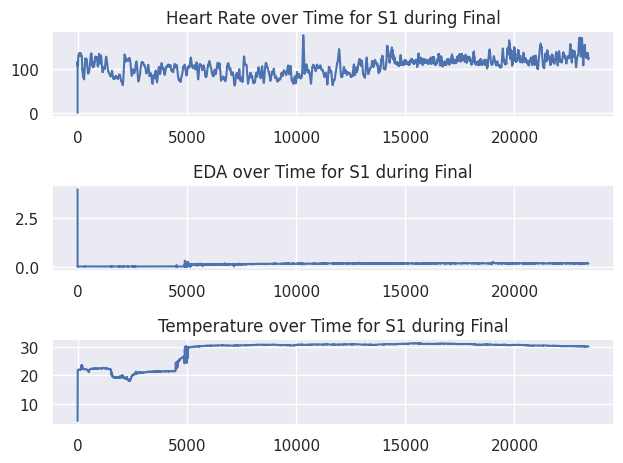

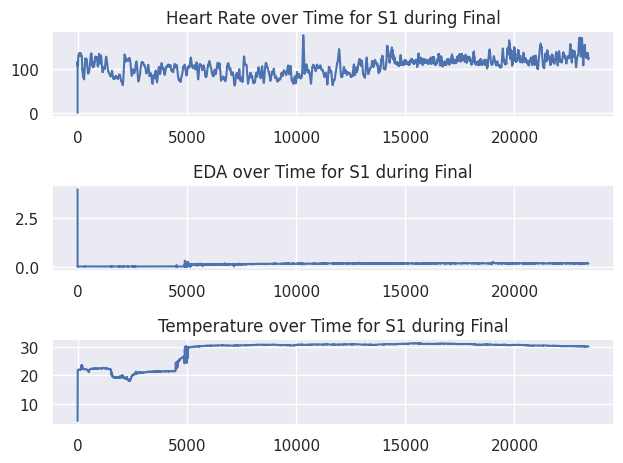

In [6]:
def plot_physiological_signals(data, subject_id, session, output_dir='/workspaces/4-it-s-about-time-rishim3000/data/plots'):
    """Create plots of physiological signals for a given subject and session.
    
    Parameters
    ----------
    data : pd.DataFrame
        Preprocessed physiological data
    subject_id : str
        Subject identifier (e.g., 'S1')
    session : str
        Session identifier (e.g., 'Midterm 1')
    output_dir : str
        Directory to save plot files
        
    Returns
    -------
    matplotlib.figure.Figure
        Figure object containing the plots
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    subsetted_data = data[(data['subject_id'] == subject_id) & (data['session'] == session)]

    figure, axis = plt.subplots(3, 1)
    
    axis[0].plot(subsetted_data['timestamp'], subsetted_data['heart_rate'], label=f'{subject_id} - {session}')
    axis[0].set_title(f'Heart Rate over Time for {subject_id} during {session}')

    axis[1].plot(subsetted_data['timestamp'], subsetted_data['eda'], label=f'{subject_id} - {session}')
    axis[1].set_title(f'EDA over Time for {subject_id} during {session}')
    
    axis[2].plot(subsetted_data['timestamp'], subsetted_data['temperature'], label=f'{subject_id} - {session}')
    axis[2].set_title(f'Temperature over Time for {subject_id} during {session}')

    plt.tight_layout()
    
    plot_filename = f'{subject_id}_{session.replace(" ", "_")}.png'
    save_path = os.path.join(output_dir, plot_filename)
    plt.savefig(save_path)

    print(f"Plot saved to: {output_dir}")
    return figure
    # Your code here
    # 1. Create figure with subplots
    # 2. Plot each physiological signalFinal
    # 3. Add labels and titles
    # 4. Save plot to file

processed_data = preprocess_data(raw_data)
plot_physiological_signals(processed_data, subject_id = 'S1', session = 'Final')